Before Image PreProcessing : 


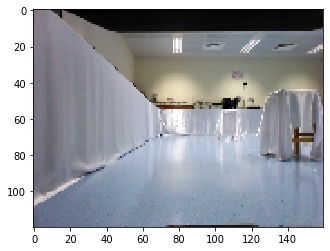

[[[[122 110 128]
   [126 114 131]
   [129 116 134]
   ...
   [  7   7   7]
   [  7   7   7]
   [  7   7   7]]

  [[125 110 128]
   [127 114 130]
   [129 116 132]
   ...
   [  7   7   7]
   [  7   7   7]
   [  7   7   7]]

  [[129 111 127]
   [129 114 129]
   [130 117 130]
   ...
   [  9   9   9]
   [  9   9   9]
   [  9   9   9]]

  ...

  [[ 92  94 123]
   [ 90  96 124]
   [ 89  98 125]
   ...
   [131 137 166]
   [134 139 167]
   [135 139 166]]

  [[ 92  94 124]
   [ 92  95 123]
   [ 92  97 122]
   ...
   [133 134 165]
   [135 135 167]
   [137 135 168]]

  [[ 92  94 124]
   [ 93  95 122]
   [ 94  96 120]
   ...
   [134 132 165]
   [136 133 167]
   [138 133 169]]]]
After image PreProcessing : 


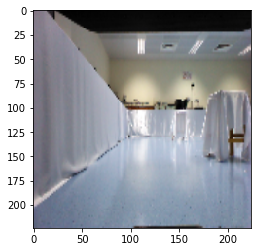

['reg_-45', 'rgb_-90', 'rgb_0', 'rgb_45', 'rgb_90']
Maximum probability class label : [2]
Class label of maximum probability : rgb_0


In [ ]:
from tkinter import messagebox
from tkinter import *
from tkinter import simpledialog
import tkinter
from tkinter import filedialog
from tkinter.filedialog import askopenfilename
from keras.models import load_model
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from pprint import pprint
import numpy as np


main = tkinter.Tk()
main.title("Obstacle Detection")
main.geometry("1300x1200")
iFlag = False
pre = False
def upload():
    
    global filename
    text.delete('1.0', END)
    filename = askopenfilename(initialdir = "D:\DataSet")
    pathlabel.config(text=filename)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        text.insert(END,"Dataset loaded\n\n")
    else :
        iFlag = True;
        text.insert(END,"Incorrect Input Format")

def imagePreprocess():
    if not iFlag :
        global pre
        pre = True
        global filename
        global img4
        image=cv2.imread(filename)
        img3 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        print("Before Image PreProcessing : ")
        plt.imshow(img3,interpolation='none')
        plt.show()
        img3 = cv2.resize(img3,(224,224))
        img4= np.reshape(img3,[1,224,224,3])
        print(img4)
        print("After image PreProcessing : ")
        plt.imshow(img3,interpolation='none')
        plt.show()
        #cv2.imshow("Image",img3)
        text.insert(END,"Image Preporcess Done\n\n")
    else :
        text.insert(END,"Incorrect Input Format")

def loadmodel():
    if not iFlag :
        if pre == True:
            global model
            model=load_model('mymodel_2.h5')
            text.insert(END,"trained Model loaded")
        else :            
            text.insert(END,"Preprocess image before uploading")            
    else :
        text.insert(END,"Incorrect Input Format")

            
        

def predict():
    if not iFlag:
        if pre == True:
            global img4
            global model
            classes=['reg_-45', 'rgb_-90', 'rgb_0', 'rgb_45', 'rgb_90']
            pred = model.predict_classes(img4)
            print(classes)
            print("Maximum probability class label :",pred)
            print("Class label of maximum probability :",classes[pred[0]])
            '''
            ynew = model.predict_proba(img4)
            print(len(ynew))
            
            np.set_printoptions(suppress=True)
            for i in range(len(ynew)):
                for j in ynew[i]:
                    print(j)
            
             '''       
            #for i in range(len(ynew)):
               # print(classes[i],":",ynew[i])
                #print(ynew[i])
            stri = " Predicted class for Image: "+str(classes[pred[0]])
            text.insert(END,stri)
        else :            
            text.insert(END,"Preprocess image before uploading")
    else :
        text.insert(END,"Incorrect Input Format")



font = ('times', 16, 'bold')
title = Label(main, text='Obstacle-Avoidance Algorithm Using Deep Learning.')
title.config(bg='sky blue', fg='black')  
title.config(font=font)           
title.config(height=3, width=120)       
title.place(x=0,y=5)

font1 = ('times', 14, 'bold')
upload = Button(main, text="Upload Image File", command=upload)
upload.place(x=250,y=690)
upload.config(font=font1)

pathlabel = Label(main)
pathlabel.config(bg='dark orchid', fg='white')  
pathlabel.config(font=font1)
pathlabel.place(x=50,y=750)

imp= Button(main, text="Image Preprocess", command=imagePreprocess)
imp.place(x=440,y=690)
imp.config(font=font1)

ml = Button(main, text="Model Load", command=loadmodel)
ml.place(x=650,y=690)
ml.config(font=font1)

pt = Button(main, text="Predict For Image", command=predict)
pt.place(x=800,y=690)
pt.config(font=font1)

font1 = ('times', 12, 'bold')
text=Text(main,height=30,width=80)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=300,y=100)
text.config(font=font1)

main.config(bg='snow')
main.mainloop()